# 💰 Financial Transactions Analysis — Revenue, Expense, Profit Insights

In [2]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [3]:
# STEP 2: Load Dataset
df = pd.read_csv('D:/Desktop/GenAI-Powered Analytics Platform/Data/raw/finance_data.csv', parse_dates=['transaction_date'])
print('Shape:', df.shape)
df.info()
df.head()

Shape: (30000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    30000 non-null  object        
 1   transaction_date  30000 non-null  datetime64[ns]
 2   department        30000 non-null  object        
 3   transaction_type  30000 non-null  object        
 4   description       30000 non-null  object        
 5   amount            30000 non-null  float64       
 6   currency          30000 non-null  object        
 7   profit_margin     11503 non-null  float64       
 8   cost_center       30000 non-null  object        
 9   payment_method    30000 non-null  object        
 10  approval_status   30000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 2.5+ MB


,transaction_id,transaction_date,department,transaction_type,description,amount,currency,profit_margin,cost_center,payment_method,approval_status
0,TXN-110004,2023-01-01,Sales,Revenue,Subscription Revenue,9122.47,INR,0.62,CC-SALES-01,Credit,Approved
1,TXN-116302,2023-01-01,Sales,Expense,Trade Show Costs,1444.65,USD,NaN,CC-SALES-02,Credit,Approved
2,TXN-106857,2023-01-01,Sales,Revenue,License Sales,1126.81,GBP,0.60,CC-SALES-02,Bank Transfer,Approved
3,TXN-102117,2023-01-01,Operations,Expense,Office Rent,4160.93,USD,NaN,CC-OPS-02,Bank Transfer,Pending
4,TXN-122819,2023-01-01,IT,Expense,Hardware Purchase,9679.85,USD,NaN,CC-IT-01,Bank Transfer,Approved


In [4]:
# STEP 3: Data Cleaning & Overview
print('Missing Values:', df.isnull().sum())
print('Duplicate Rows:', df.duplicated().sum())
df.describe(include='all').T

Missing Values: transaction_id          0
transaction_date        0
department              0
transaction_type        0
description             0
amount                  0
currency                0
profit_margin       18497
cost_center             0
payment_method          0
approval_status         0
dtype: int64
Duplicate Rows: 0


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
transaction_id,30000,30000,TXN-103391,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_date,30000,NaN,NaN,NaN,2023-12-30 18:09:33.120000,2023-01-01 00:00:00,2023-06-28 00:00:00,2023-12-31 00:00:00,2024-07-03 00:00:00,2024-12-30 00:00:00,NaN
department,30000,5,Sales,10541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_type,30000,2,Expense,18497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,30000,46,Subscription Revenue,1536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,30000.0,NaN,NaN,NaN,13760.314359,4.88,1450.555,4109.98,11718.915,1849573.77,42319.079888
currency,30000,4,USD,15036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profit_margin,11503.0,NaN,NaN,NaN,0.561453,0.11,0.46,0.58,0.68,0.89,0.146356
cost_center,30000,14,CC-SALES-01,3635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,30000,4,Bank Transfer,14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\akasar\AppData\Local\Temp\1\ipykernel_19288\2509784908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transaction_type', data=df, palette='pastel')


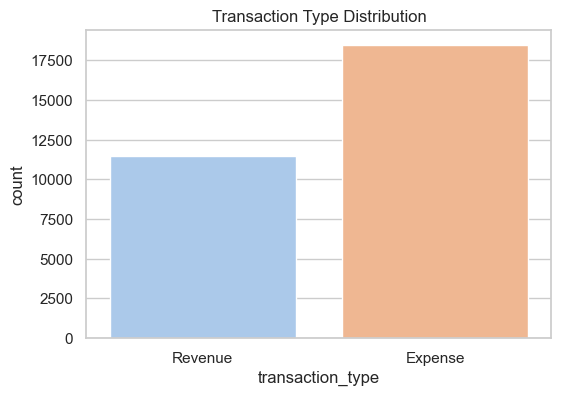

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_19288\2509784908.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='department', data=df, order=df['department'].value_counts().index, palette='viridis')


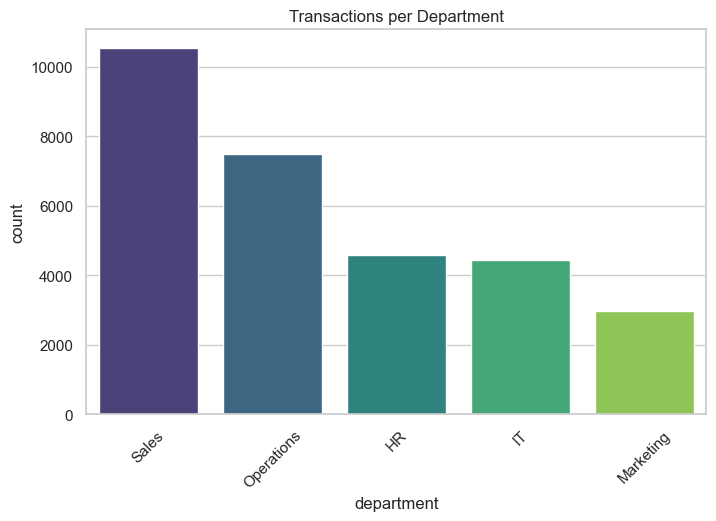

In [5]:
# STEP 4: Transaction Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='transaction_type', data=df, palette='pastel')
plt.title('Transaction Type Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='department', data=df, order=df['department'].value_counts().index, palette='viridis')
plt.title('Transactions per Department')
plt.xticks(rotation=45)
plt.show()

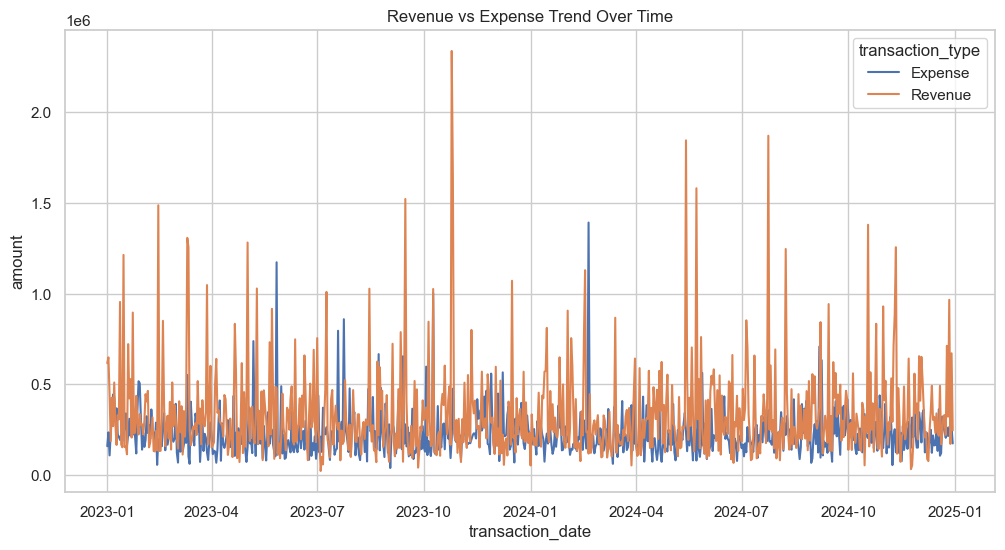

In [6]:
# STEP 5: Revenue vs Expense Trend Over Time
df_grouped = df.groupby(['transaction_date', 'transaction_type'])['amount'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='transaction_date', y='amount', hue='transaction_type', data=df_grouped)
plt.title('Revenue vs Expense Trend Over Time')
plt.show()

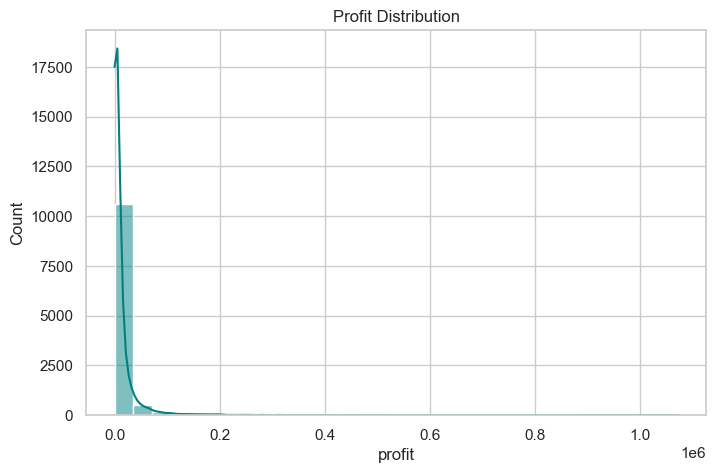

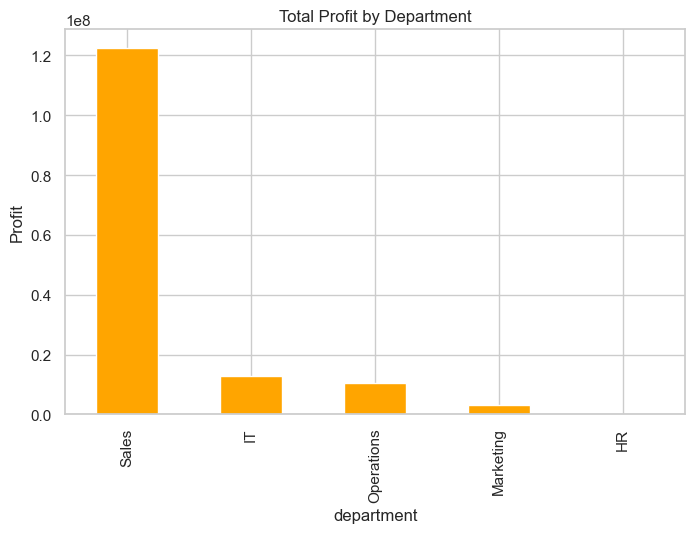

In [7]:
# STEP 6: Profit Analysis (Only for Revenue)
revenue_df = df[df['transaction_type'] == 'Revenue'].copy()
revenue_df['profit'] = revenue_df['amount'] * revenue_df['profit_margin']

plt.figure(figsize=(8,5))
sns.histplot(revenue_df['profit'], bins=30, kde=True, color='teal')
plt.title('Profit Distribution')
plt.show()

profit_by_dept = revenue_df.groupby('department')['profit'].sum().sort_values(ascending=False)
profit_by_dept.plot(kind='bar', figsize=(8,5), color='orange')
plt.title('Total Profit by Department')
plt.ylabel('Profit')
plt.show()

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_19288\1793245394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='approval_status', data=df, palette='coolwarm')


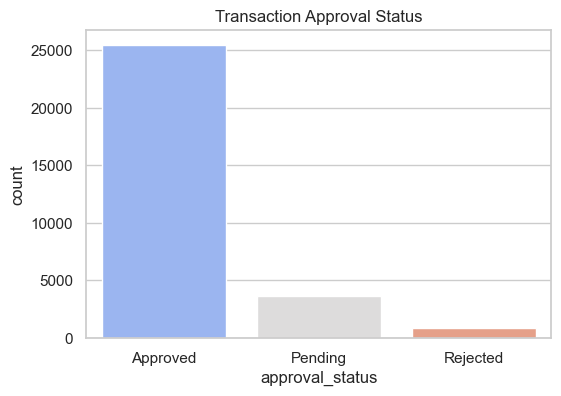

Approval Rate (%): approval_status
Approved    84.983333
Pending     12.133333
Rejected     2.883333
Name: proportion, dtype: float64


In [9]:
# STEP 7: Approval Status Analysis
plt.figure(figsize=(6,4))
sns.countplot(x='approval_status', data=df, palette='coolwarm')
plt.title('Transaction Approval Status')
plt.show()

approval_rate = df['approval_status'].value_counts(normalize=True) * 100
print('Approval Rate (%):', approval_rate)

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_19288\432122725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='currency', data=df, palette='Set2')


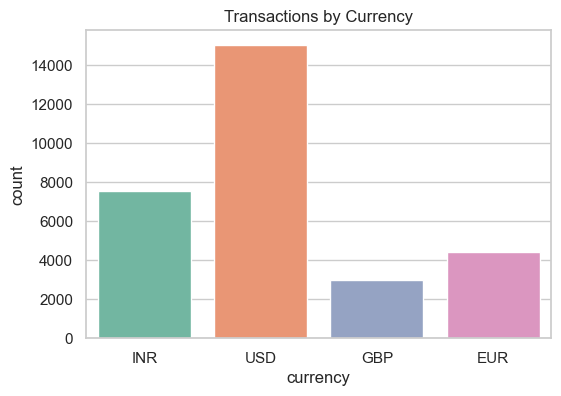

In [10]:
# STEP 8: Currency Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='currency', data=df, palette='Set2')
plt.title('Transactions by Currency')
plt.show()

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_19288\2968794416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_method', data=df, order=df['payment_method'].value_counts().index, palette='Blues')


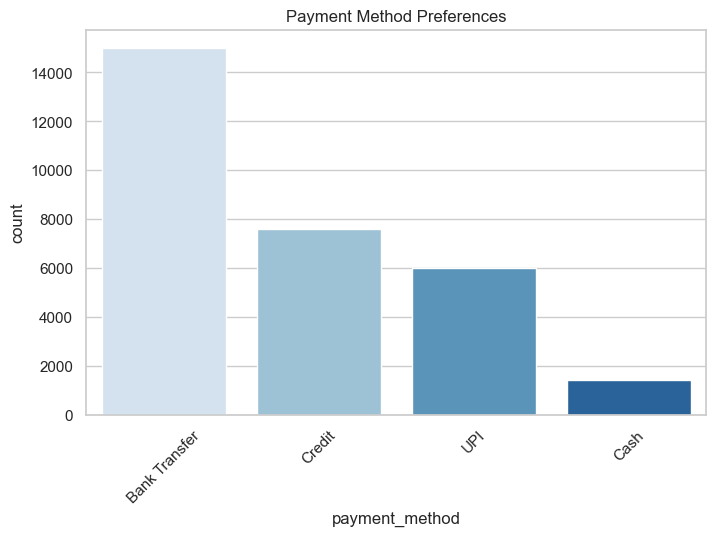

In [11]:
# STEP 9: Payment Method Usage
plt.figure(figsize=(8,5))
sns.countplot(x='payment_method', data=df, order=df['payment_method'].value_counts().index, palette='Blues')
plt.title('Payment Method Preferences')
plt.xticks(rotation=45)
plt.show()

In [12]:
# STEP 10: Key Financial Insights
summary = pd.DataFrame({
    'Total Revenue': [df[df['transaction_type']=='Revenue']['amount'].sum()],
    'Total Expense': [df[df['transaction_type']=='Expense']['amount'].sum()],
})
summary['Net Profit'] = summary['Total Revenue'] - summary['Total Expense']
summary['Profit Margin (%)'] = (summary['Net Profit'] / summary['Total Revenue']) * 100
summary.T

,0
Total Revenue,2.461608e+08
Total Expense,1.666486e+08
Net Profit,7.951222e+07
Profit Margin (%),3.230092e+01
